## Building a CNN to classify images.


### รูปภาพที่ให้มามี 4 คลาส โดยมีหมายเลขคลาสดังนี้:
<ol start="0">
<li> frog
<li> cat
<li> dog
<li> horse
</ol>

In [14]:
import time, datetime
import requests, pickle
import numpy as np
from tensorflow import keras
from IPython import display

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import random, os, tensorflow as tf

def set_seed(seed_value=12345):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # to Disable GPU training

In [18]:
print('Default GPU Device:', tf.test.gpu_device_name() or 'None')

Default GPU Device: None


In [20]:
class_names = ['frog', 'cat', 'dog', 'horse']


(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(open('364_midterm_data.pkl', "rb"))

# url = "https://drive.google.com/uc?id=1v6wfLWvOzq2Aaw7MuhnkZd1VRCgLTh4b"
# (X_train, y_train, X_val, y_val, X_test, y_test) = pickle.loads(requests.get(url).content)

In [41]:
X_test.shape

(2400, 32, 32, 3)

### ดูรูปภาพในชุดข้อมูล

In [21]:
def show_images(X, y, class_names, n_rows=3, n_cols=8, figsize=(9, 4)):
    fig = plt.figure(figsize=figsize)
    for i in range(0, n_rows):
        for j in range(0, n_cols):
            idx = i*n_cols + j
            image = X[idx]
            label = class_names[y[idx][0]]        
            ax = plt.subplot(n_rows, n_cols, idx+1)
            plt.imshow(image)
            plt.text(16, 36, str(y[idx]) + ' - ' + label, ha='center')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

[0] frog


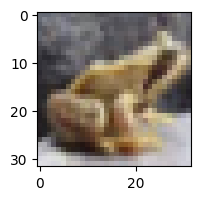

In [22]:
print(y_test[1], class_names[y_test[1][0]])
plt.figure(figsize=(2, 2))
plt.imshow(X_test[1])

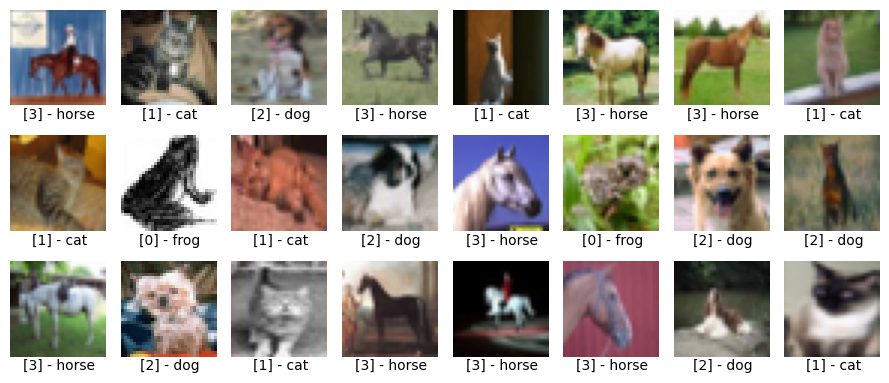

In [23]:
show_images(X_train, y_train, class_names, 3, 8)

### Normalize images and One-Hot Encode labels

In [24]:
n_classes = len(class_names)

y_train = keras.utils.to_categorical(y_train, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [25]:
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

<style> h3 { margin-top: 0.5em !important; margin-bottom: 0.0em; }
        h4 { margin-top: 0.1em !important; margin-bottom: 0.1em; }
        h5 { margin-top: 0.0em; margin-bottom: 0.2em; } </style>

# <span style="color:blue">โจทย์คำถาม</span>
* ### เพื่อป้องกันผลกระทบจาก randomness ให้นิสิตใช้ค่า seed เป็น 12345 ในทุกกรณีที่เกี่ยวข้องกับการสุ่ม และให้เรียกใช้ฟังก์ชัน set_seed(12345) ทุกครั้งก่อนที่จะสร้างโมเดล
* ### ให้สร้างโมเดลด้วย CNN เพื่อให้ได้ accuracy ที่ดีที่สุด และห้ามใช้ Early Stopping หรือใช้ Best Weights ในการเทรนโมเดล โดยให้เทรนโมเดลเต็มจำนวน epoch ที่นิสิตกำหนด โดยค่า epoch ต้องไม่น้อยกว่า 50 และต้องหารด้วย 20 ลงตัว
  * #### (10 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.65
  * #### (15 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.70
  * #### (20 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.73
  * #### (25 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.75
  * #### (30 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.80
  * #### (35 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.83
  * #### (40 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.85
  * #### (50 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.90  
* ### (25 คะแนน) ให้แสดงกราฟ Loss และ Accuracy ของโมเดลที่เกิดจากการเทรนโมเดล และหลังจากโมเดลถูกเทรนแล้วเสร็จ ให้แสดงค่า Accuracy ที่วัดได้จากชุดข้อมูล train, validation และ test
* ### (25 คะแนน) ให้แสดง Confusion Matrix ผลการทำนายที่ได้จากโมเดลด้วยข้อมูลเทส
  ##### บอกใบ้ จากโค้ดข้างล่าง ค่าข้อมูลแต่ละตัวใน y_pred (ที่ได้จาก model.predict(...)) และ y_test จะมี 4 จำนวน (ตามจำนวนคลาส) โดยใน y_pred จะเก็บค่าความน่าจะเป็นที่อินพุต X_test จะเป็นแต่ละคลาส เช่น [0.6, 0.05, 0.15, 0.2] ซึ่งหมายถึง ความน่าจะเป็นที่อินพุตจะเป็นคลาส 0 มีค่าเป็น 0.6 และในลักษณะเดียวกัน y_test จะเก็บค่าผลเฉลยซึ่งอยู่ในรูป One-Hot Encoding เช่น [0, 0, 0, 1] ซึ่งหมายถึง ผลเฉลยของอินพุตเป็นคลาส 3 เป็นต้น เราใช้ np.argmax(...) เพื่อแปลงค่าที่อยู่ในรูปเวกเตอร์ให้กลายเป็นค่าสเกลาร์ เพื่อความสะดวกในการเปรียบเทียบระหว่างผลทำนายกับผลเฉลย
    ```python
    y_pred = model.predict(X_test, verbose=0)
    y_test_1d = np.argmax(y_test, axis=1
    y_pred_1d = np.argmax(y_pred, axis=1)
    ```
  ##### ในโมดูล sklearn ภายใต้ metrics มีฟังก์ชัน confusion_matrix(...) ที่ใช้คำนวณ Confusion Matrix<br>
* ### (25 คะแนน) ให้คำนวณค่า Recall ของแต่ละคลาสด้วยข้อมูลเทส โดยให้เขียนตอบในรูปนิพจน์ตามตัวอย่างด้านล่าง ซึ่งค่า Recall บ่งบอกถึงความสามารถของโมเดลในการทำนายคลาสที่สนใจได้อย่างถูกต้อง โดยโมเดลที่มีค่า Recall สูงบ่งบอกถึงโมเดลสามารถทำนายคลาสที่สนใจได้ถูกต้องเป็นจำนวนมาก ค่า Recall คำนวณได้จากสูตรข้างล่างนี้ <br><br> $$ Recall = {TruePositives \over TruePositives + FalseNegatives} $$ 
### จากตัวอย่างในตาราง Confusion Matrix ด้านล่างนี้ ค่า Recall ของคลาส Apple คำนวณได้จาก 7 / (7 + 1 + 3) = 0.6364 ส่วนของคลาส Orange คำนวณได้จาก 2 / (2 + 8 + 2) = 0.1667 และของคลาส Mango คำนวณได้จาก 1 / (1 + 9 + 3) = 0.0769

 <center><img src="https://drive.google.com/thumbnail?id=1v8N__pdOnfAV-JwBR4rfKJdTSqOSeAv4&sz=w500"></center>

* ### (โบนัส 20 คะแนน) จงเปรียบเทียบและอธิบายค่า Recall ที่คำนวณได้จากทั้ง 4 คลาส และให้แสดงภาพจำนวน 5 ภาพที่มาจากคลาสที่มีค่า Recall สูงสุดแต่โมเดลทำนายผิด โดยให้แสดงค่าคลาสของแต่ละภาพที่โมเดลทำนายออกมาด้วย

In [44]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from sklearn.metrics import confusion_matrix

from matplotlib.ticker import MaxNLocator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
X_train.shape

(19200, 32, 32, 3)

In [52]:
seed = 12345
set_seed(seed)

batch_size = 16
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (5, 5), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
            #   loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 64)          102464    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                 

In [54]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=80, 
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/80
600/600 [==============================] - 15s 25ms/step - loss: 1.0449 - accuracy: 0.5453 - val_loss: 0.9070 - val_accuracy: 0.6175
Epoch 2/80
600/600 [==============================] - 15s 25ms/step - loss: 0.9257 - accuracy: 0.6100 - val_loss: 0.8184 - val_accuracy: 0.6496
Epoch 3/80
600/600 [==============================] - 16s 27ms/step - loss: 0.8497 - accuracy: 0.6477 - val_loss: 0.7542 - val_accuracy: 0.6871
Epoch 4/80
600/600 [==============================] - 15s 25ms/step - loss: 0.7749 - accuracy: 0.6849 - val_loss: 0.7502 - val_accuracy: 0.6758
Epoch 5/80
600/600 [==============================] - 15s 25ms/step - loss: 0.7265 - accuracy: 0.7063 - val_loss: 0.7782 - val_accuracy: 0.6804
Epoch 6/80
600/600 [==============================] - 15s 25ms/step - loss: 0.6667 - accuracy: 0.7344 - val_loss: 0.7219 - val_accuracy: 0.6925
Epoch 7/80
600/600 [==============================] - 15s 25ms/step - loss: 0.6253 - accuracy: 0.7543 - val_loss: 0.9335 - val_accuracy:

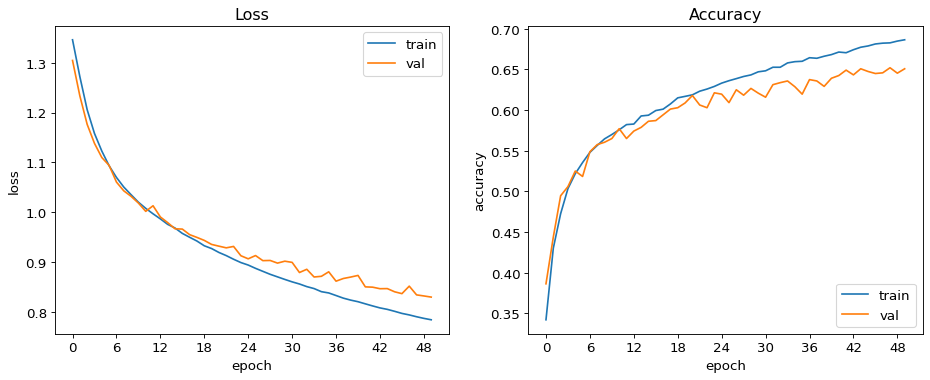

In [49]:
fig = plt.figure(figsize=(14, 5), dpi=80)
ax = fig.add_subplot(1, 2, 1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper right')

ax = fig.add_subplot(1, 2, 2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='lower right')

In [51]:
print('Train_accuracy: ', history.history['accuracy'][-1])
print('Val_accuracy: ', history.history['val_accuracy'][-1])

Train_accuracy:  0.686510443687439
Val_accuracy:  0.6508333086967468


In [35]:
print('Train Loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_train, y_train, verbose=0)))
print(' Test Loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_test, y_test, verbose=0)))
print()

y_pred = model.predict(X_test, verbose=0)

y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)
    
cm = confusion_matrix(y_true=y_test_1d, y_pred=y_pred_1d).T
print(cm)

Train Loss: 0.879560, Accuracy: 0.646146
 Test Loss: 0.897351, Accuracy: 0.627917

[[443  71  46  26]
 [108 359 219  77]
 [ 27 118 266  58]
 [ 22  52  69 439]]


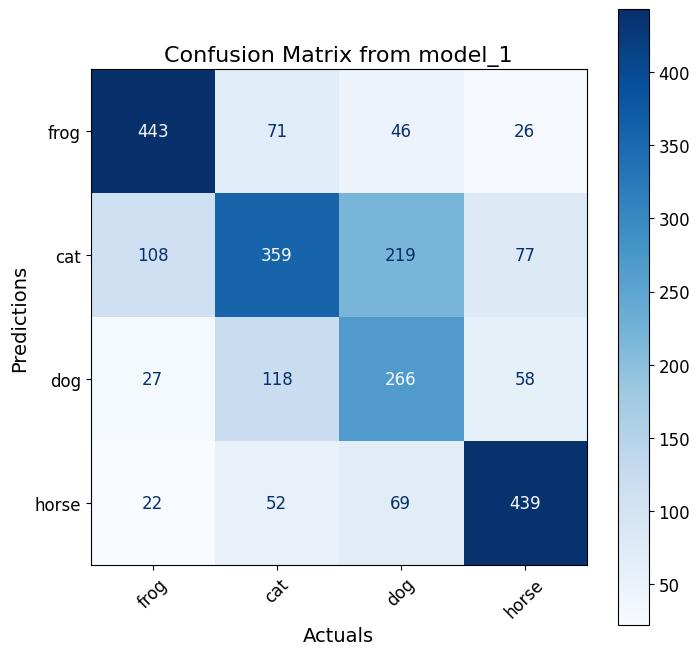

In [37]:
plt.rcParams.update({'font.size': 12})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xlabel('Actuals', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)    
plt.title('Confusion Matrix from model_1', fontsize=16)
plt.show()

In [38]:
np.set_printoptions(precision=2)

'''
    Precision : ratio of correctly predicted positive 
                observations to the total predicted positives.
    Precision = TP / (TP + FP)
    
    Recall : ratio of correctly predicted 
             positive observations to the total actual positives.
    Recall = TP / (TP + FN)
    
    F1-score : harmonic mean of precision and recall,
               providing a balance between precision and recall.
    F1-score = 2 * (Precision * Recall) / (Precision + Recall)
    
    Support : number of actual occurrences of the class in the specified dataset.
'''

print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names))

              precision    recall  f1-score   support

        frog       0.76      0.74      0.75       600
         cat       0.47      0.60      0.53       600
         dog       0.57      0.44      0.50       600
       horse       0.75      0.73      0.74       600

    accuracy                           0.63      2400
   macro avg       0.64      0.63      0.63      2400
weighted avg       0.64      0.63      0.63      2400



In [ ]:
# Assuming 'cm' is the confusion matrix
num_classes = cm.shape[0]

# Calculate recall for each class
recall_per_class = np.zeros(num_classes)
for i in range(num_classes):
    true_positives = cm[i, i]
    false_negatives = np.sum(cm[i, :]) - true_positives
    recall_per_class[i] = true_positives / (true_positives + false_negatives)

# Print recall for each class
for i in range(num_classes):
    print('Recall for Class {}: {:.4f}'.format(i, recall_per_class[i]))
